## Random Forest Diabetes 

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("/run/media/kevin/DATA/DATA SCIENCE/Dataset/diabetes.tsv",sep='\t')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [9]:
# Check Null data
data.isnull().any()

AGE    False
SEX    False
BMI    False
BP     False
S1     False
S2     False
S3     False
S4     False
S5     False
S6     False
Y      False
dtype: bool

<AxesSubplot: xlabel='SEX', ylabel='BMI'>

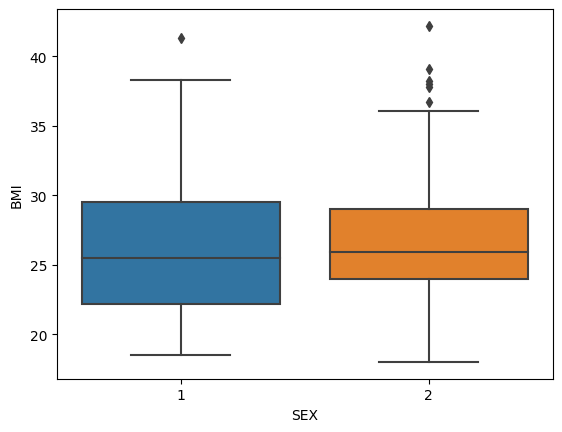

In [10]:
#Nilai rata2 BMI yang banyak
sns.boxplot(data=data,x='SEX',y='BMI')

<AxesSubplot: xlabel='count', ylabel='SEX'>

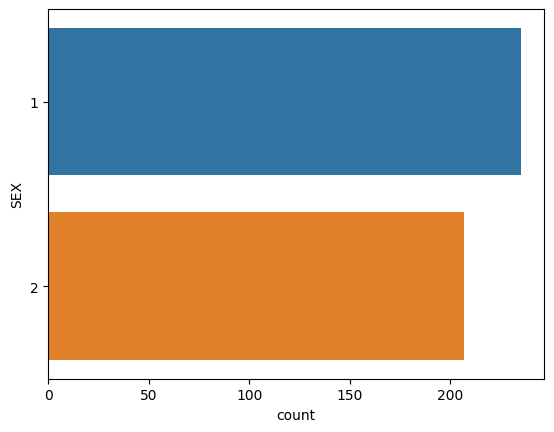

In [11]:
#Berapa jumlah pria dan wanita
sns.countplot(data=data,y='SEX')

<AxesSubplot: >

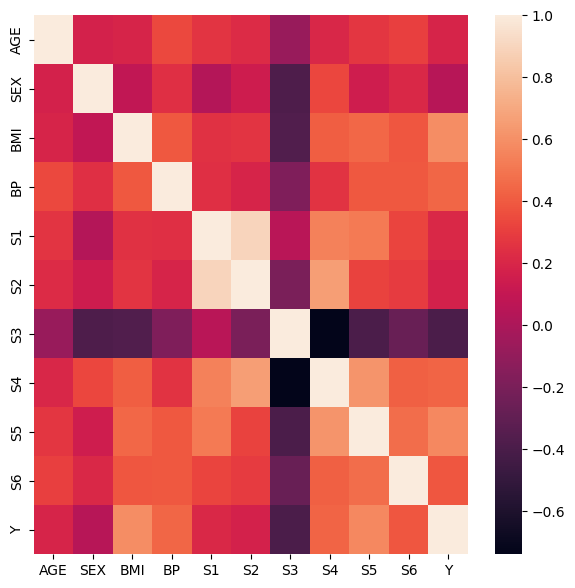

In [12]:
fig = plt.figure(figsize=(7,7))
cor = data.corr()
sns.heatmap(cor)
# data.corr

## Random Forest Regressor Model

In [13]:
X = data.drop(columns='Y')
y = data['Y']

In [14]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1)
# model.fit(X,y)
model.fit(X,y)

RandomForestRegressor(random_state=1)

In [15]:
# PREDIKSI

Xt = X[:20]

prediksi = model.predict(Xt)

Text(0.5, 1.0, 'Random Forest Regressor')

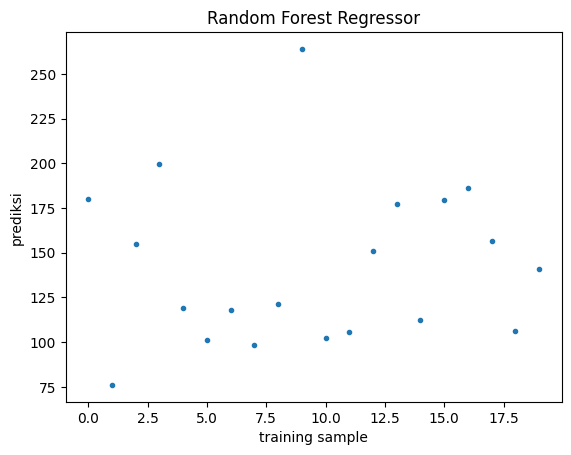

In [16]:

plt.plot(prediksi,'.',label="RandomForestRegressor")
plt.ylabel("prediksi")
plt.xlabel("training sample")
plt.title("Random Forest Regressor")

In [17]:
import numpy as np
prediksi = np.round(prediksi)
y = np.array(y)
y=y[:20]

In [18]:
prediksi

array([180.,  76., 155., 200., 119., 101., 118.,  99., 121., 264., 102.,
       106., 151., 177., 112., 179., 186., 157., 106., 141.])

In [19]:
y

array([151,  75, 141, 206, 135,  97, 138,  63, 110, 310, 101,  69, 179,
       185, 118, 171, 166, 144,  97, 168])

## EVAL

In [20]:
from sklearn import metrics
def nilai(real_value,predict):
    nilai_r2 = metrics.r2_score(real_value,predict)
    nilai_mae = metrics.mean_squared_error(real_value,predict) 
    nilai_mse =metrics.mean_absolute_error(real_value,predict)
    nilai_rmse = np.sqrt(metrics.mean_squared_error(real_value,predict))
    # return nilai_r2,nilai_mae,nilai_mse,nilai_rmse
    datafrem = pd.DataFrame({'r2 square':[nilai_r2],'MAE':[nilai_mae],'MSE':[nilai_mse],'RMSE':[nilai_rmse]})
    return datafrem
nilai(y,prediksi)

,r2 square,MAE,MSE,RMSE
0,0.853235,448.8,17.0,21.1849


## Save Model

In [21]:
import joblib

joblib.dump(model,'diabetes_RandomForest.joblib')

['diabetes_RandomForest.joblib']

In [23]:
test = joblib.load('diabetes_RandomForest.joblib')
test


RandomForestRegressor(random_state=1)